In [ ]:
from google.colab import drive


In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

listings="/content/drive/MyDrive/listings.csv"
df = pd.read_csv(listings)

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [ ]:
raw=df[['id','host_is_superhost','neighbourhood_group_cleansed','property_type','room_type','accommodates',
             'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

In [ ]:
# change the data type of price from string to interger
raw['price']=raw['price'].str.replace('$','')
raw['price']=raw['price'].str.replace(',','')
raw['price']=raw['price'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
raw.isnull().any()

id                              False
host_is_superhost               False
neighbourhood_group_cleansed    False
property_type                   False
room_type                       False
accommodates                    False
bathrooms                       False
bedrooms                        False
beds                            False
bed_type                        False
amenities                       False
number_of_reviews               False
review_scores_rating            False
review_scores_accuracy          False
review_scores_cleanliness       False
review_scores_checkin           False
review_scores_communication     False
review_scores_location          False
review_scores_value             False
price                           False
dtype: bool

In [ ]:
# check the number of missing values of each coulumn
raw.shape[0]-raw.count()

id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

In [ ]:
import numpy as np
# create a function that replace NA with 0
def fill_na(data,col_name):
    '''
    Function that fills na with 0 in review score related columns
    Args:
        data: name of dataset
        col_name: name of colums that have missing values
    ''' 
    data[col_name][np.isnan(data[col_name])]=0

# apply the function to review related features
for i in raw.filter(regex='^review'):
    fill_na(raw,i)

# check whether we successfully replace NAs with 0
raw.shape[0]-raw.count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

In [ ]:
# drop those records having missing values in the rest of columns.
raw=raw.dropna(subset=['host_is_superhost','property_type','bathrooms','bedrooms','beds'])

raw.shape[0]-raw.count()

id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

In [ ]:
# only filter numeric features
raw2=raw[['accommodates','bathrooms', 'bedrooms', 'beds', 'amenities','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

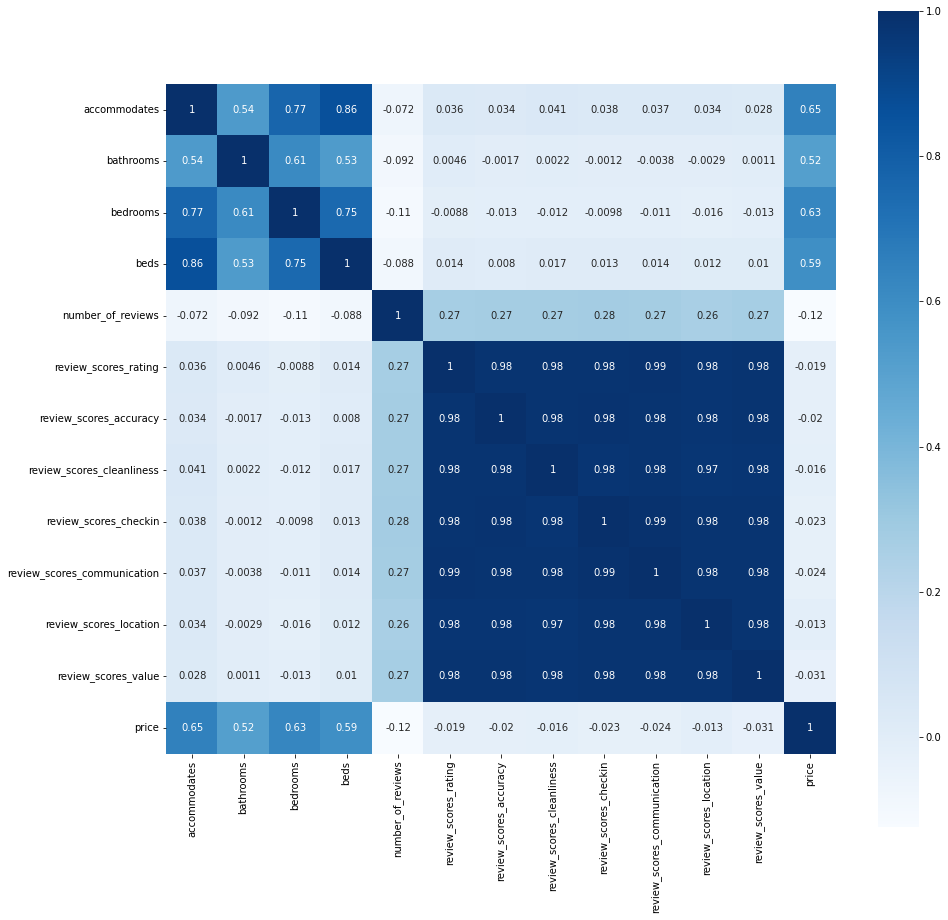

In [ ]:
# plot the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
def cm(df):
    dfData = df.corr()
    plt.subplots(figsize=(15, 15)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.show()

cm(raw2)

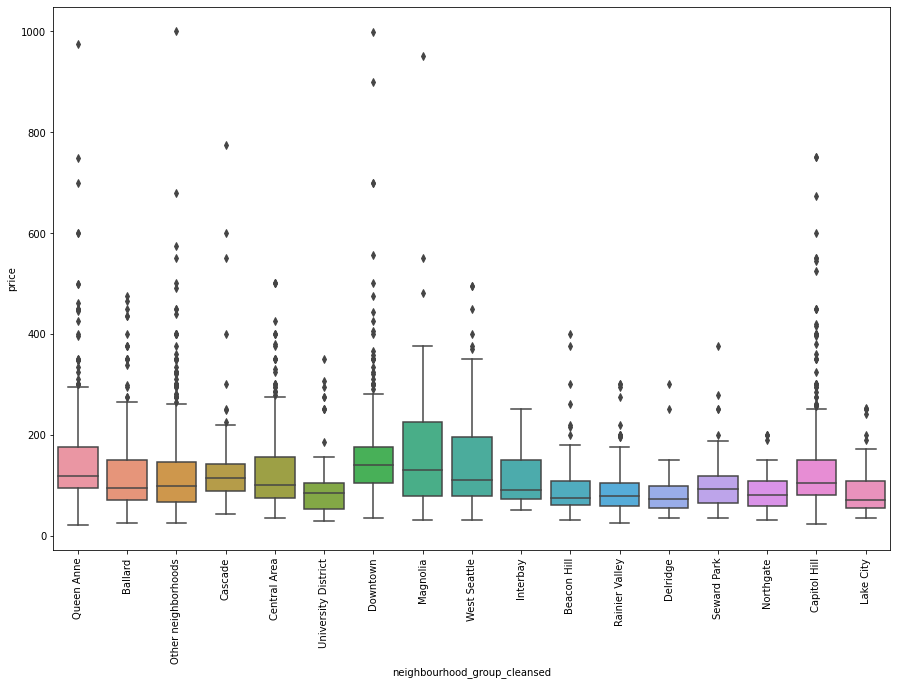

In [ ]:
# make a box plot to see whether different neighbourhood group 's booked persent distribution varied
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['neighbourhood_group_cleansed'], y=raw['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

AttributeError: ignored

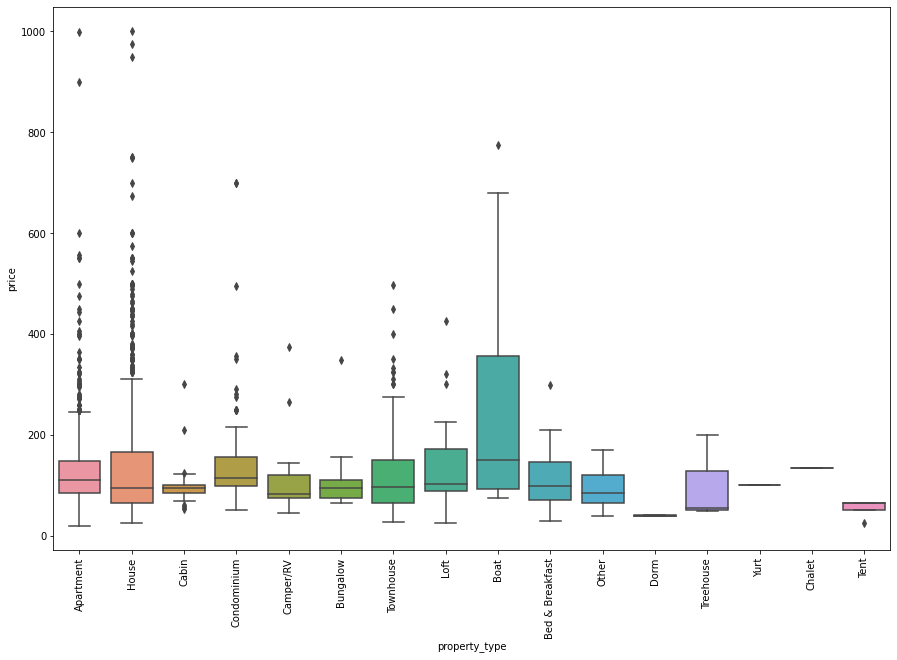

In [ ]:
# make a box plot to see whether different property type's booked persent distribution varied
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['property_type'], y=raw['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.plt.show()

AttributeError: ignored

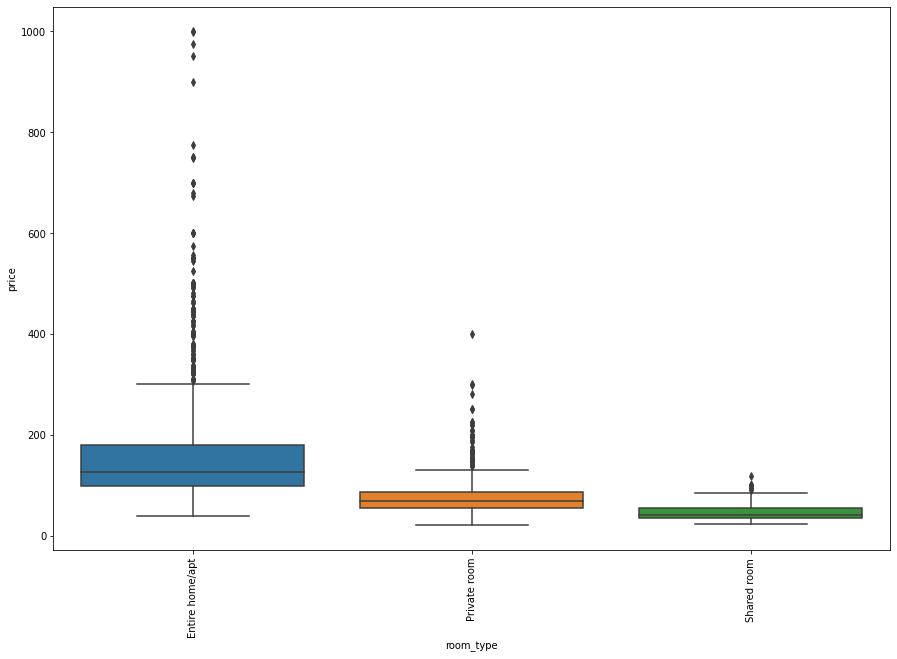

In [ ]:
# make a box plot to see whether different room type's booked persent distribution varied
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['room_type'], y=raw['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.plt.show()